<h1><center>Relatório I - Tesouros</center></h1>
<h2><center>Fernando Nast</center></h2>

Este relatório utiliza como base os preços diários de compra e venda dos Títulos do Tesouro Nacional. As informações usadas iniciam a partir do ano de 2002 até o ano de 2020, onde está contido os preços diários dos títulos LTN, LFT, NTN-B, NTN-B Principal, NTN-C e NTN-F.
* LTN (Tesouro Prefixado): letras do Tesouro Nacional. Título pré-fixado com pagamento de juros apenas no vencimento;
* LFT (Tesouro SELIC): letras financeiras do Tesouro. Título pós-fixado atrelado à SELIC, com resgate de juros e principal apenas no vencimento;
* NTN-B (Tesouro IPCA): notas do Tesouro Nacional série B. Título pós-fixado atrelado ao IPCA + taxa variável, com cupons semestrais;
* NTN-B Principal (Tesouro IPCA): indêntico ao NTN-B porém com pagamento de juros apenas no vencimento;
* NTN-C (Tesouro IGPM+): notas do Tesouro Nacional série C. Título pós-fixado atrelado ao IGPM, com cupons semestrais;
* NTN-F (Tesouro Prefixado): notas do Tesouro Nacional série F. Título pré-fixado com cupons semestrais.

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cd tesouro

C:\Users\Fernando Nast\turma-2020-2\data\intermediate\tesouro


In [3]:
cwd = glob.os.getcwd()

In [4]:
filepath = str(cwd)+'\\dataset.csv' # Arquivo criado pelo Código do Exercicio 01
dataset = pd.read_csv(filepath)

## 1. Criando as tabelas Estatísticas dos Tesouros

In [5]:
dataset.replace(to_replace=['NTNBPrinc','NTNBPrincipal'],value='NTNBP',inplace=True)

for tesouro in list(dataset['Bond'].value_counts().index.sort_values()):
    estat = dataset[dataset['Bond']==str(tesouro)]
    estat = estat.dropna(subset=['Taxa Compra Manhã','Taxa Venda Manhã','PU Compra Manhã','PU Venda Manhã'],how='any')
    
    estat = estat.aggregate([np.max,np.min,np.std,np.mean,np.median])
    mad = dataset[dataset['Bond']==str(tesouro)].mad().drop('Year')
    
    estat = estat.drop(['Data','Maturity','Year','Bond'],axis=1)
    estat = estat.append(mad,ignore_index=True)
    estat = estat.rename({0:'Maximo',1:'Minimo',2:'Desv.Padrao',3:'Media',4:'Mediana',5:'MAD'})
        
    if tesouro=='LFT':
        LFT_est = estat
    elif tesouro=='LTN':
        LTN_est = estat
    elif tesouro=='NTNB':
        NTNB_est = estat
    elif tesouro=='NTNBP':
        NTNBP_est = estat
    elif tesouro=='NTNC':
        NTNC_est = estat
    elif tesouro=='NTNF':
        NTNF_est = estat

tabelas = {'LFT':LFT_est,'LTN':LTN_est,'NTNB':NTNB_est,'NTNBP':NTNBP_est,'NTNC':NTNC_est,'NTNF':NTNF_est}
tabelas = pd.concat(tabelas)

In [6]:
tabelas

Taxa Compra Manhã  Taxa Venda Manhã  PU Compra Manhã  \
LFT   Maximo                0.027300          0.027700     10503.050000   
      Minimo               -0.000900         -0.000700      1245.900000   
      Desv.Padrao           0.004164          0.004224      2381.294704   
      Media                 0.001361          0.001682      4332.447207   
      Mediana               0.000000          0.000300      3815.330000   
      MAD                   0.002270          0.002341      1850.965892   
LTN   Maximo                0.375400          0.376400      1000.000000   
      Minimo                0.043000          0.044200       346.720000   
      Desv.Padrao           0.041138          0.041061       116.459717   
      Media                 0.127976          0.128590       842.966065   
      Mediana               0.122300          0.122800       863.600000   
      MAD                   0.030799          0.030735        91.724157   
NTNB  Maximo                0.130100          0.130300      5059.400000   
      Minimo               -0.009900         -0.009700         0.000000   
      Desv.Padrao           0.019741          0.019636       753.088173   
      Media                 0.063954          0.064652      2210.269305   
      Mediana               0.063000          0.063800      2027.000000   
      MAD                   0.014665          0.014556       618.318043   
NTNBP Maximo                0.110200          0.110800      3224.890000   
      Minimo               -0.015800         -0.014600       310.050000   
      Desv.Padrao           0.016187          0.016117       725.253208   
      Media                 0.056177          0.056992      1389.486553   
      Mediana               0.058200          0.059000      1261.660000   
      MAD                   0.012257          0.012163       609.132545   
NTNC  Maximo                0.171100          0.171300      7775.620000   
      Minimo               -0.028200         -0.028000         0.000000   
      Desv.Padrao           0.023578          0.023438      1354.726136   
      Media                 0.075688          0.076295      2539.976003   
      Mediana               0.075000          0.075600      2036.255000   
      MAD                   0.019028          0.018916      1066.827671   
NTNF  Maximo                0.205700          0.206700      1280.500000   
      Minimo                0.042800          0.044000         0.000000   
      Desv.Padrao           0.024837          0.024737        80.500041   
      Media                 0.116515          0.117198       975.446692   
      Mediana               0.118700          0.119400       978.000000   
      MAD                   0.018894          0.018800        61.679131   

                   PU Venda Manhã  PU Base Manhã  
LFT   Maximo         10501.920000   10500.080000  
      Minimo          1242.170000    1458.700000  
      Desv.Padrao     2379.196562    2319.874632  
      Media           4328.246782    4539.431527  
      Mediana         3811.815000    3978.930000  
      MAD             1849.481875    1807.885168  
LTN   Maximo          1000.000000    1000.000000  
      Minimo           345.490000     345.280000  
      Desv.Padrao      117.061152     116.867495  
      Media            842.175374     843.127574  
      Mediana          863.120000     864.320000  
      MAD               92.207162      91.658487  
NTNB  Maximo          4958.550000    4957.790000  
      Minimo             0.000000     919.770000  
      Desv.Padrao      741.686718     741.182664  
      Media           2195.535443    2195.411044  
      Mediana         2019.530000    2019.430000  
      MAD              609.688132     609.361834  
NTNBP Maximo          3224.890000    3224.380000  
      Minimo           305.760000     305.640000  
      Desv.Padrao      726.897503     726.658163  
      Media           1379.062991    1378.474507  
      Mediana         1242.350000    1241.800000  
      MAD          

## 2. Criando os Gráficos

C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


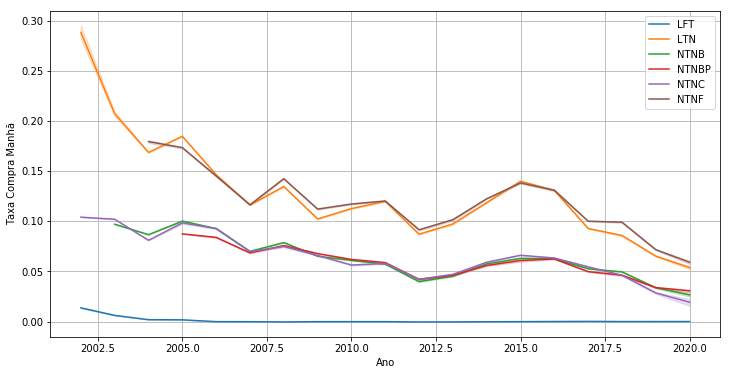

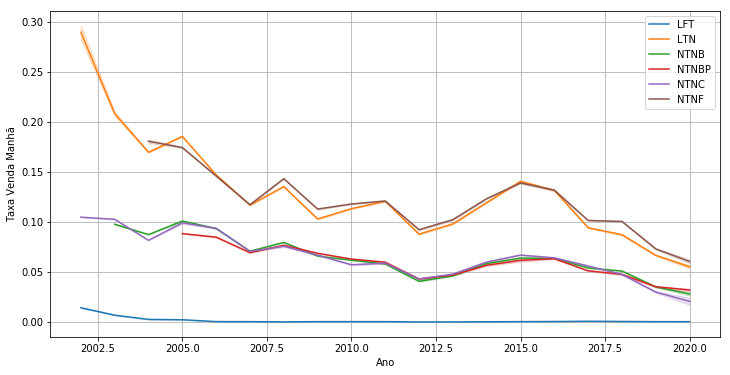

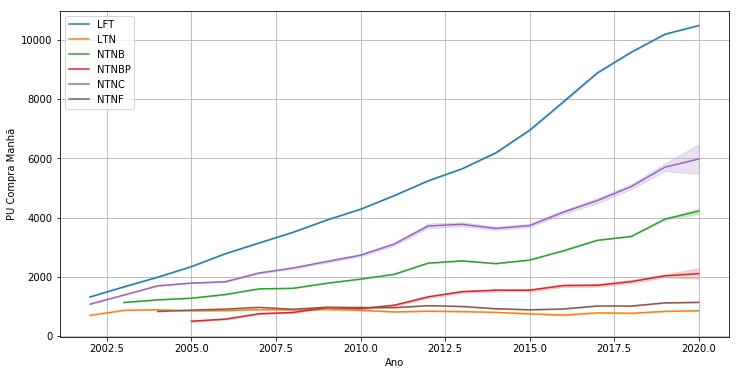

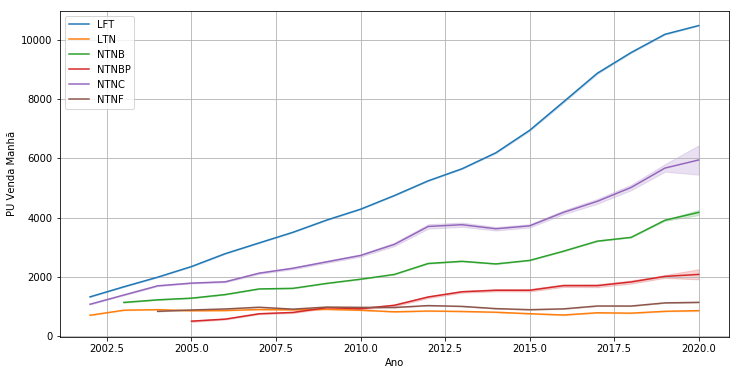

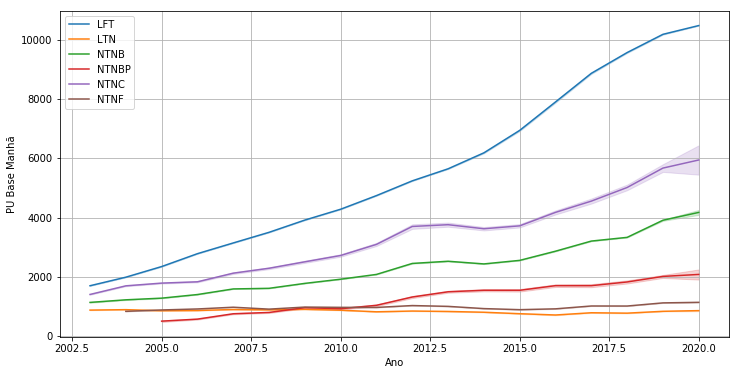

In [7]:
lista_tesouro = list(dataset['Bond'].value_counts().index.sort_values()) # lista de tesouros

for taxa in dataset.columns[1:6]:
    plt.figure(figsize=(12,6))
    
    for tesouro in lista_tesouro:
        base = dataset[dataset['Bond']==str(tesouro)].loc[:][['Maturity','Year',str(taxa),
                                                   'Bond']].dropna(subset=[str(taxa)],how='any')
        
        sns.lineplot(x=base['Year'],y=base[str(taxa)])
    
    plt.legend(lista_tesouro)
    plt.xlabel('Ano')
    plt.grid(b=1)
    plt.show()

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


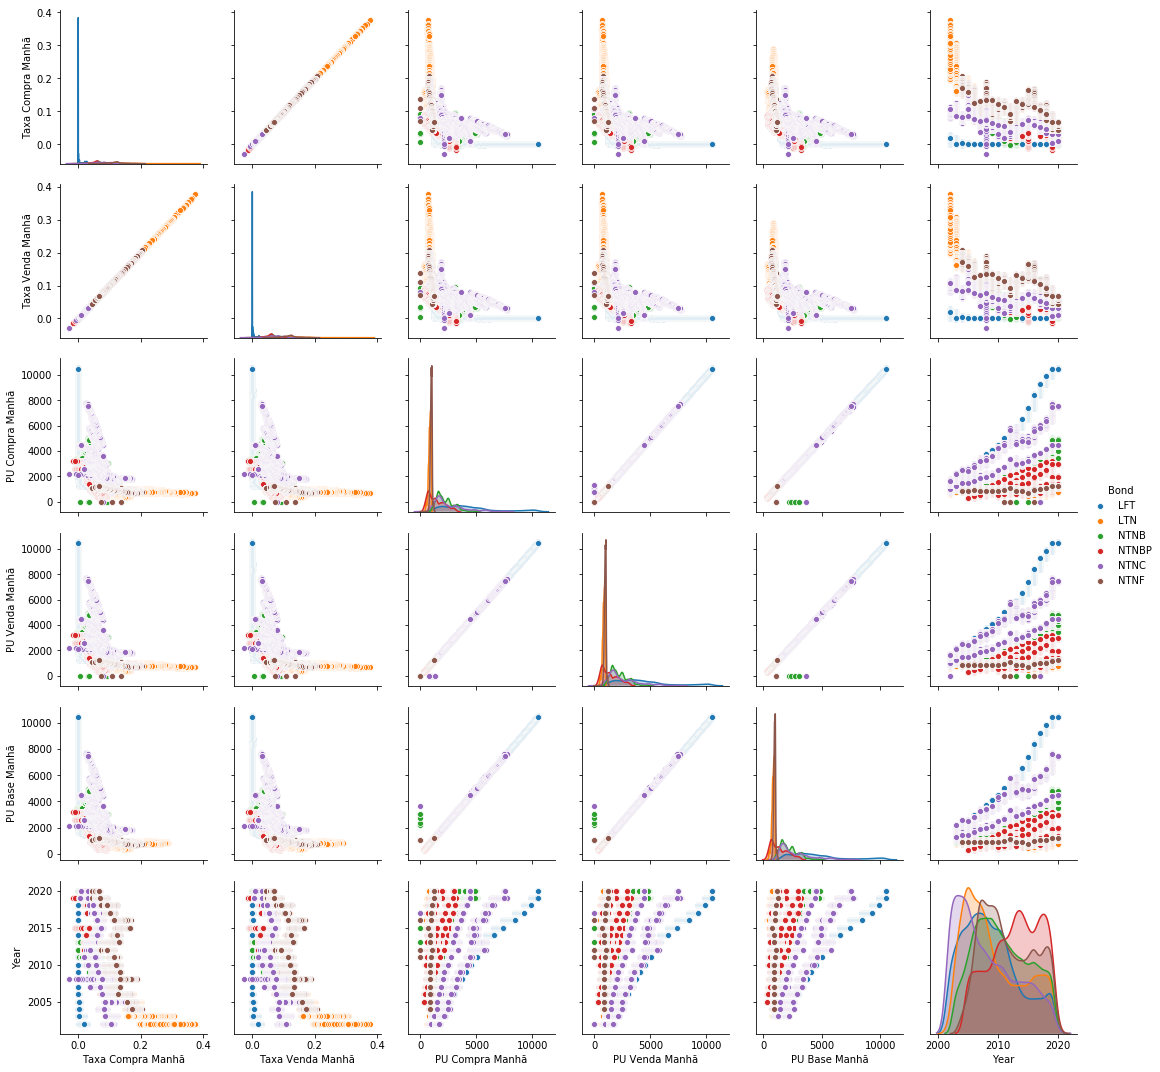

In [8]:
sns.pairplot(data=dataset,hue='Bond')